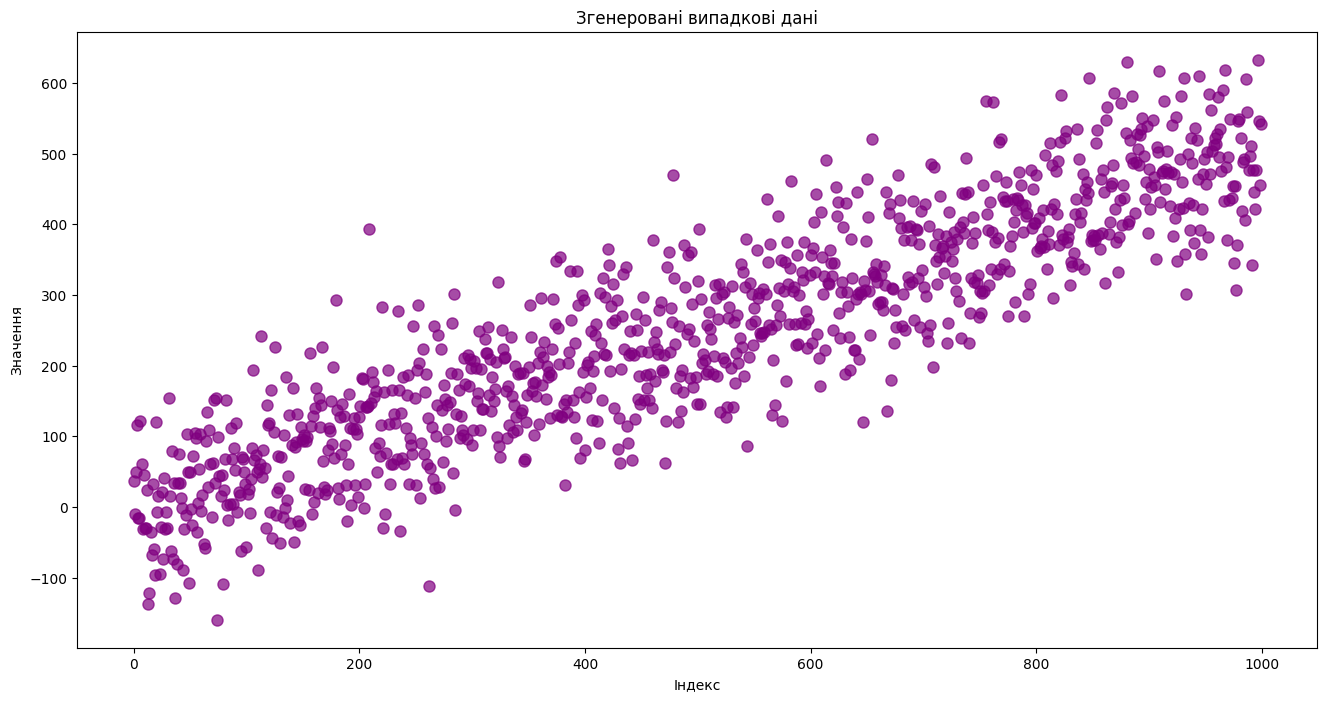

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.arange(1000)
y = 0.5 * x + np.random.randn(1000) * 75

df = pd.DataFrame({'Index': x, 'Value': y})

plt.figure(figsize=(16, 8))
plt.plot(df['Index'], df['Value'], 'o', markersize=8, alpha=0.7, color='purple')
plt.title("Згенеровані випадкові дані")
plt.xlabel("Індекс")
plt.ylabel("Значення")
plt.show()

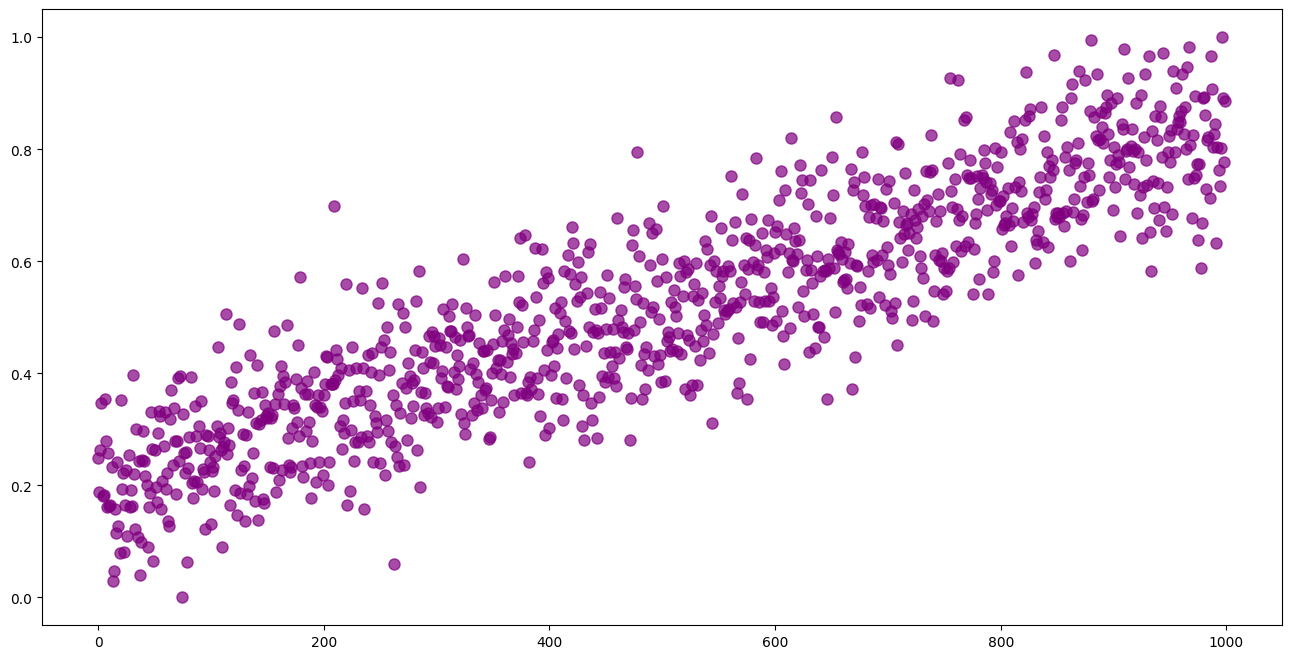

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Normalized_Value'] = scaler.fit_transform(df[['Value']])

plt.figure(figsize=(16, 8))
plt.plot(df['Index'], df['Normalized_Value'], 'o', markersize=8, alpha=0.7, color='purple')

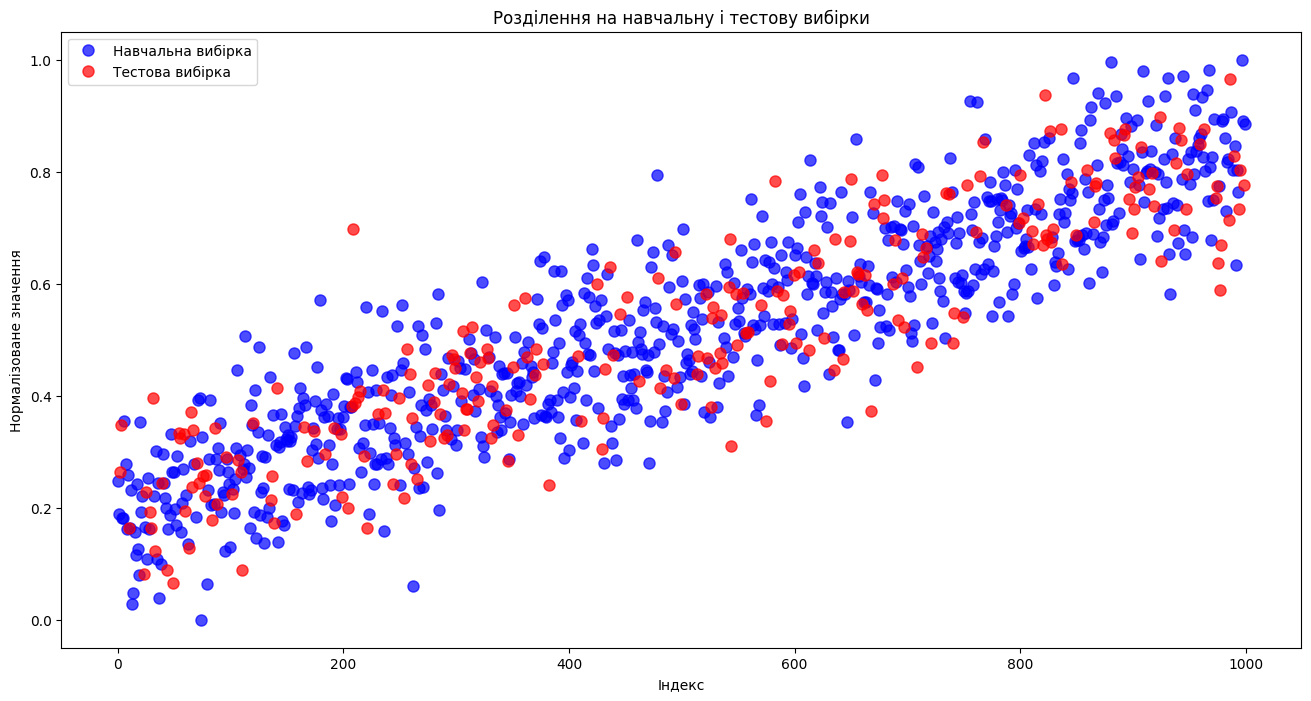

In [5]:
X = df[['Normalized_Value']]
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

plt.figure(figsize=(16, 8))
plt.plot(X_train.index, X_train['Normalized_Value'], 'o', markersize=8, alpha=0.7, color='blue', label="Навчальна вибірка")
plt.plot(X_test.index, X_test['Normalized_Value'], 'o', markersize=8, alpha=0.7, color='red', label="Тестова вибірка")
plt.title("Розділення на навчальну і тестову вибірки")
plt.xlabel("Індекс")
plt.ylabel("Нормалізоване значення")
plt.legend()
plt.show()

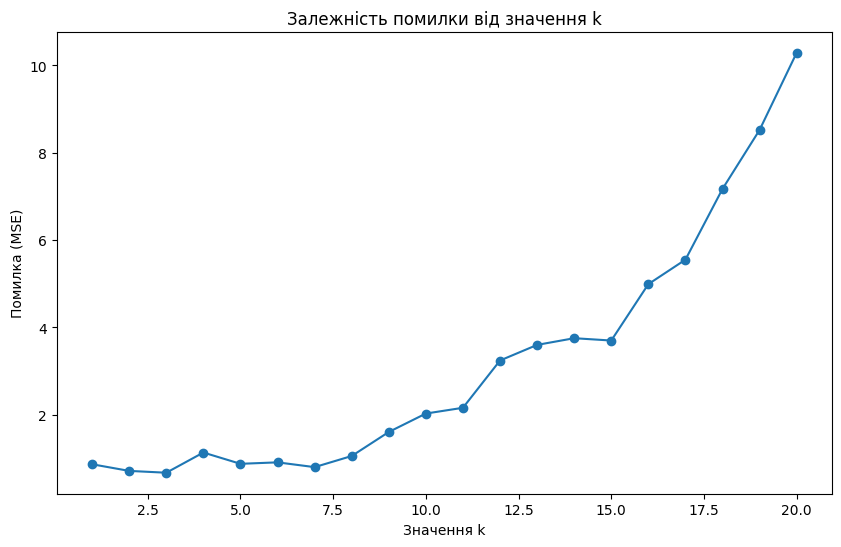

In [39]:
errors = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title("Залежність помилки від значення k")
plt.xlabel("Значення k")
plt.ylabel("Помилка (MSE)")
plt.show()

In [40]:
optimal_k = k_values[np.argmin(errors)]
print(f"Найкраще значення k: {optimal_k}")

Найкраще значення k: 3


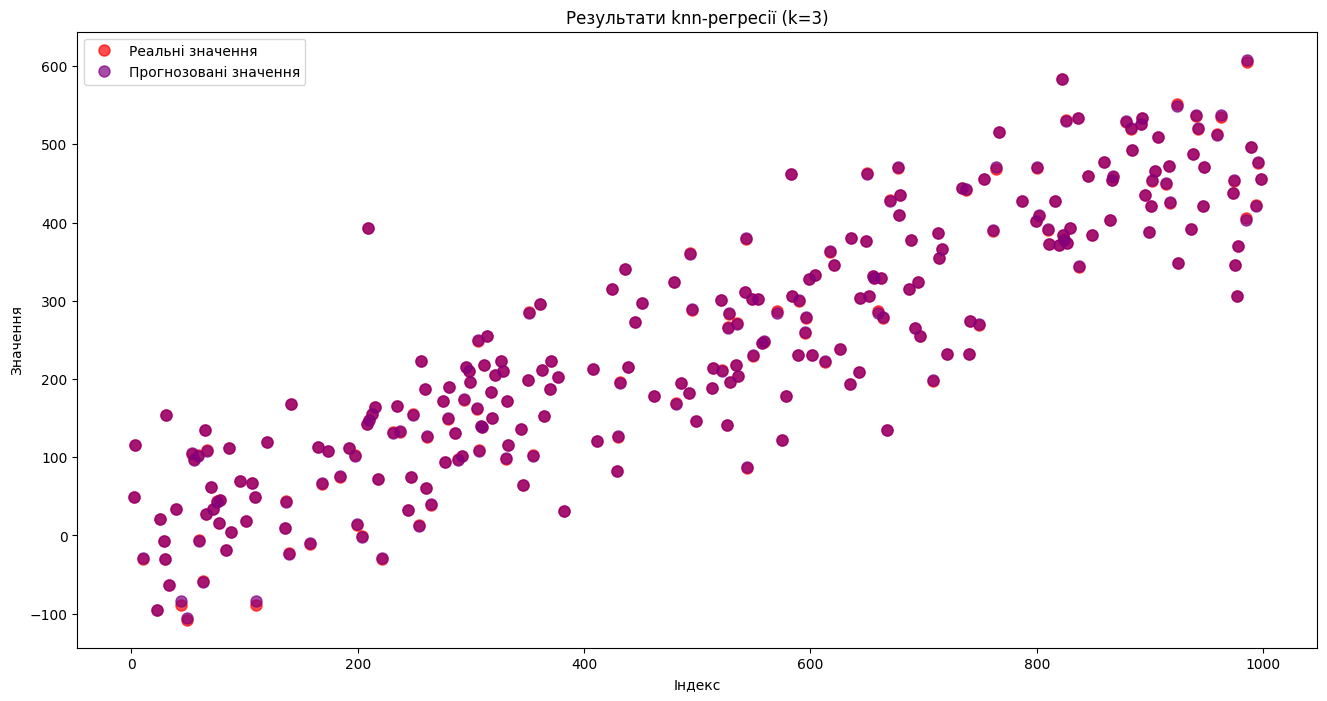

In [41]:
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

plt.figure(figsize=(16, 8))
plt.plot(y_test.index, y_test, 'o', markersize=8, alpha=0.7, color='red', label="Реальні значення")
plt.plot(y_test.index, y_pred_optimal, 'o', markersize=8, alpha=0.7, color='purple', label="Прогнозовані значення")
plt.title(f"Результати knn-регресії (k={optimal_k})")
plt.xlabel("Індекс")
plt.ylabel("Значення")
plt.legend()
plt.show()

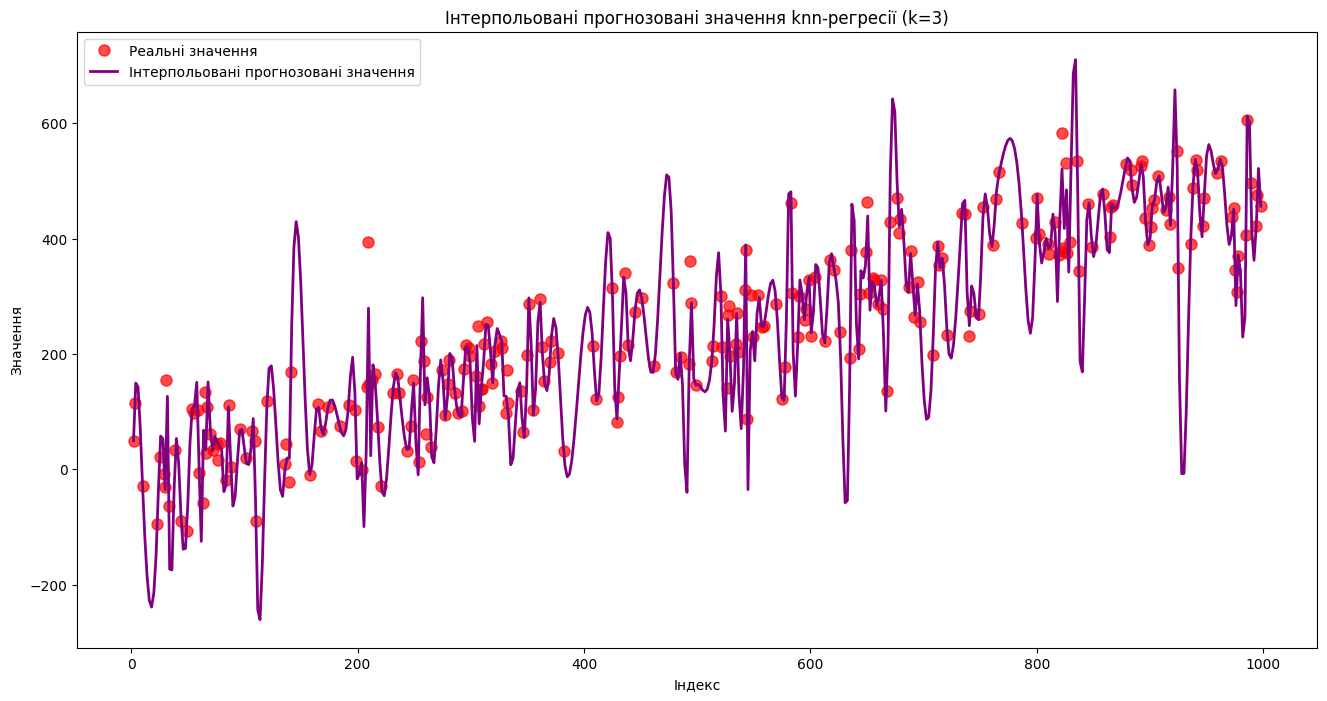

In [43]:
from scipy.interpolate import make_interp_spline

sorted_index = np.argsort(y_test.index)
sorted_x = y_test.index[sorted_index]
sorted_y_pred = y_pred_optimal[sorted_index]

x_new = np.linspace(sorted_x.min(), sorted_x.max(), 500)
spl = make_interp_spline(sorted_x, sorted_y_pred, k=3)
y_smooth = spl(x_new)

plt.figure(figsize=(16, 8))
plt.plot(y_test.index, y_test, 'o', markersize=8, alpha=0.7, color='red', label="Реальні значення")
plt.plot(x_new, y_smooth, '-', linewidth=2, color='purple', label="Інтерпольовані прогнозовані значення")
plt.title(f"Інтерпольовані прогнозовані значення knn-регресії (k={optimal_k})")
plt.xlabel("Індекс")
plt.ylabel("Значення")
plt.legend()
plt.show()